In [110]:
import pandas as pd

df_debate = pd.read_csv('debate_transcripts_cleaned.csv')
df_debate.head(10)

,debate_title,date,year,actor,dialogue,is_candidate,party,is_winner,VP_debate,is_incumbent
0,1960_Kennedy_Nixon_1,1960-09-26,1960,Kennedy,"Mr. Smith, Mr. Nixon. In the election of 1860,...",True,Democratic,True,False,False
1,1960_Kennedy_Nixon_1,1960-09-26,1960,Smith,And now the opening statement by Vice Presiden...,False,NaN,False,False,False
2,1960_Kennedy_Nixon_1,1960-09-26,1960,Nixon,"Mr. Smith, Senator Kennedy. The things that Se...",True,Republican,False,False,False
3,1960_Kennedy_Nixon_1,1960-09-26,1960,Smith,"Thank you, Mr. Nixon. That completes the openi...",False,NaN,False,False,False
4,1960_Kennedy_Nixon_1,1960-09-26,1960,Fleming,"Senator, the Vice President in his campaign ha...",False,NaN,False,False,False
5,1960_Kennedy_Nixon_1,1960-09-26,1960,Kennedy,"Well, the Vice President and I came to the Con...",True,Democratic,True,False,False
6,1960_Kennedy_Nixon_1,1960-09-26,1960,Smith,"Mr. Nixon, would you like to comment on that s...",False,NaN,False,False,False
7,1960_Kennedy_Nixon_1,1960-09-26,1960,Nixon,I have no comment.,True,Republican,False,False,False
8,1960_Kennedy_Nixon_1,1960-09-26,1960,Smith,The next question: Mr. Novins.,False,NaN,False,False,False
9,1960_Kennedy_Nixon_1,1960-09-26,1960,Novins,"Mr. Vice President, your campaign stresses the...",False,NaN,False,False,False


## EDA
#### Sentence Lenght Distribution

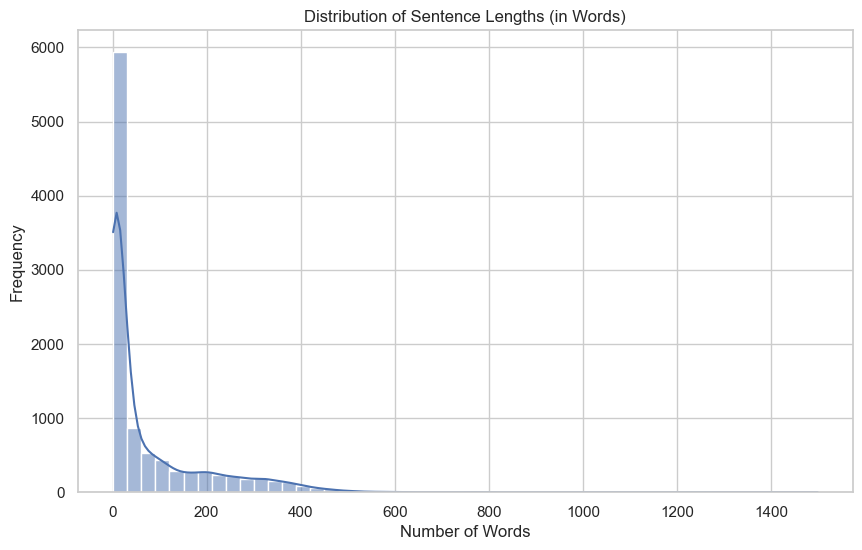

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

df_debate['word_count'] = df_debate['dialogue'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.histplot(df_debate['word_count'], bins=50, color='#4C72B0', kde=True)
plt.title('Distribution of Sentence Lengths (in Words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


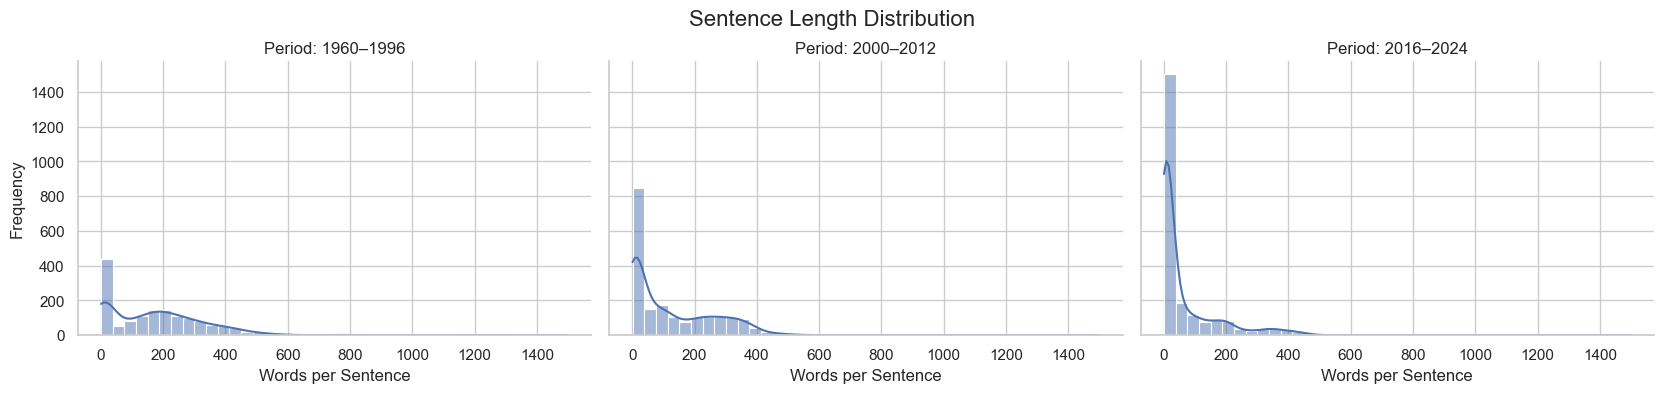

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Keep only candidates and filter outliers above 600 words
df_candidates = df_debate[df_debate['is_candidate'] == True].copy()
df_candidates['word_count'] = df_candidates['dialogue'].apply(lambda x: len(str(x).split()))

# Create 3-year election blocks
def map_year_block(y):
    if y < 2000:
        return "1960–1996"
    elif y <= 2012:
        return "2000–2012"
    else:
        return "2016–2024"

df_candidates['year_block'] = df_candidates['year'].apply(map_year_block)
# Plot
g = sns.displot(
    data=df_candidates,
    x='word_count',
    col='year_block',
    col_order=["1960–1996", "2000–2012", "2016–2024"],
    col_wrap=3,
    height=4,
    aspect=1.4,
    bins=40,
    kde=True,
    color='#4C72B0',
    facet_kws={'sharey': True}
)

g.set_titles("Period: {col_name}")
g.set_axis_labels("Words per Sentence", "Frequency")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Sentence Length Distribution", fontsize=16)
plt.show()



In [111]:
# Make sure word_count exists
df_debate['word_count'] = df_debate['dialogue'].apply(lambda x: len(str(x).split()))

# Overall average sentence length
average_sentence_length = df_debate['word_count'].mean()
print(f"Average sentence length: {average_sentence_length:.2f} words")


Average sentence length: 74.34 words


In [112]:
# Ensure word count column exists
df_debate['word_count'] = df_debate['dialogue'].apply(lambda x: len(str(x).split()))

# Filter only candidate speech
df_candidates = df_debate[df_debate['is_candidate'] == True]

# Calculate average sentence length
average_sentence_length = df_candidates['word_count'].mean()
print(f"Average sentence length (candidates only): {average_sentence_length:.2f} words")


Average sentence length (candidates only): 111.97 words


In [114]:
# Define your custom eras
def assign_time_span(year):
    if year <= 1980:
        return '1960–1980'
    elif year <= 2004:
        return '1984–2004'
    else:
        return '2008–2024'

df_candidates['time_span'] = df_candidates['year'].apply(assign_time_span)

# Compute average per span
avg_per_span = df_candidates.groupby('time_span')['word_count'].mean().reset_index(name='avg_sentence_length')
print(avg_per_span)


   time_span  avg_sentence_length
0  1960–1980           296.125000
1  1984–2004           149.767279
2  2008–2024            76.431630


/var/folders/q6/_j2zk51n3hz5tm9sn6q708xr0000gn/T/ipykernel_52330/614550247.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_candidates['time_span'] = df_candidates['year'].apply(assign_time_span)


#### Words Per Candidate

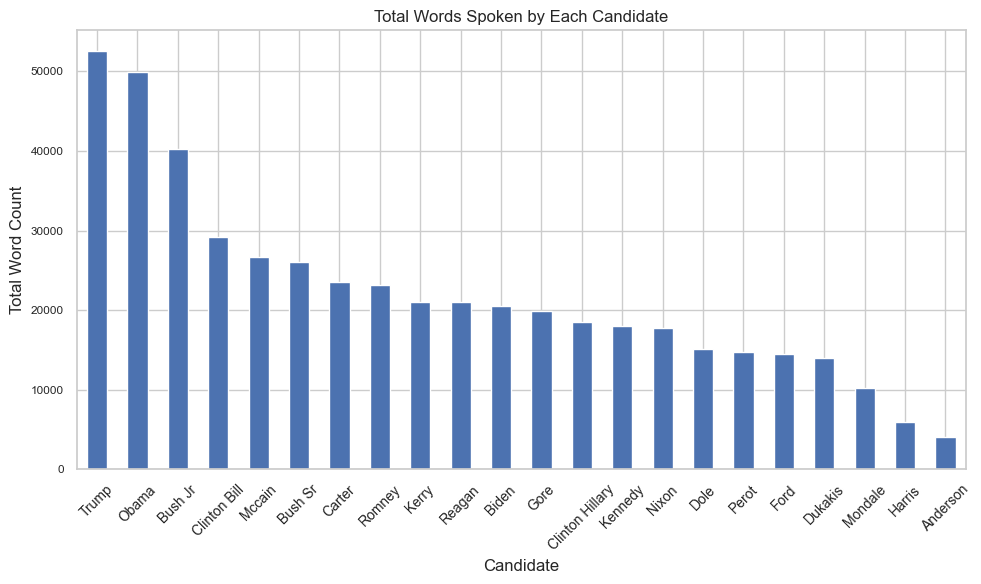

In [99]:
words_per_candidate = df_debate[(df_debate['is_candidate'] == True) & (df_debate['VP_debate'] == False)].groupby('actor')['word_count'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
words_per_candidate.plot(kind='bar', color='#4C72B0')
plt.title('Total Words Spoken by Each Candidate')
plt.ylabel('Total Word Count')
plt.xlabel('Candidate')
plt.xticks(rotation=45, size=10)
plt.yticks(size=8.5)
plt.tight_layout()
plt.show()


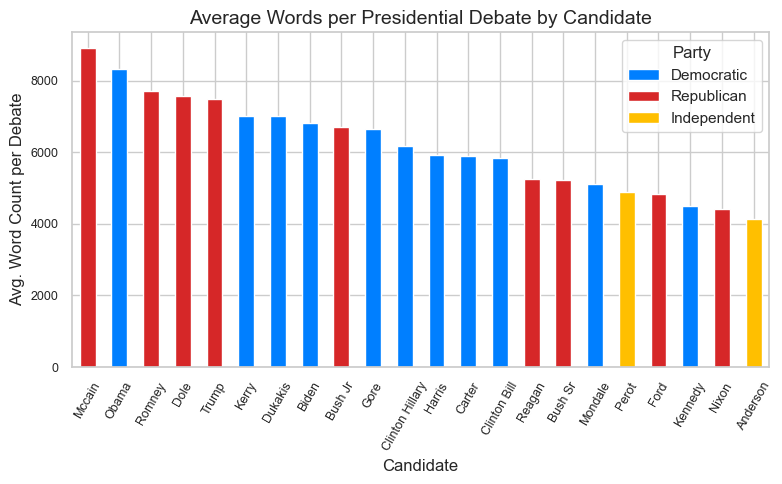

In [103]:
from matplotlib.patches import Patch

# Step 1: Filter presidential candidate data
df_debate['word_count'] = df_debate['dialogue'].apply(lambda x: len(str(x).split()))
pres_debate = df_debate[(df_debate['is_candidate'] == True) & (df_debate['VP_debate'] == False)]

# Step 2: Words per candidate per debate
words_per_debate = pres_debate.groupby(['actor', 'date'])['word_count'].sum().reset_index()
avg_words_per_candidate = words_per_debate.groupby('actor')['word_count'].mean().sort_values(ascending=False)

# Step 3: Map each candidate to their party (take the most frequent party per actor)
actor_party_map = pres_debate.groupby('actor')['party'].agg(lambda x: x.mode().iloc[0])

# Step 4: Get list of colors by actor
bar_colors = [party_palette.get(actor_party_map.get(actor, 'Independent'), '#808080') for actor in avg_words_per_candidate.index]

# Step 5: Plot
plt.figure(figsize=(8, 5))
avg_words_per_candidate.plot(
    kind='bar',
    color=bar_colors
)

legend_elements = [
    Patch(facecolor='#007FFF', label='Democratic'),
    Patch(facecolor='#d62728', label='Republican'),
    Patch(facecolor='#FFBF00', label='Independent')
]
plt.legend(handles=legend_elements, title='Party', loc='upper right')

plt.title('Average Words per Presidential Debate by Candidate', size=14)
plt.ylabel('Avg. Word Count per Debate')
plt.xlabel('Candidate')
plt.xticks(rotation=60, size=9)
plt.yticks(size=9)
plt.tight_layout()
plt.show()


#### Sentence Lenght by Party

/var/folders/q6/_j2zk51n3hz5tm9sn6q708xr0000gn/T/ipykernel_52330/154724569.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


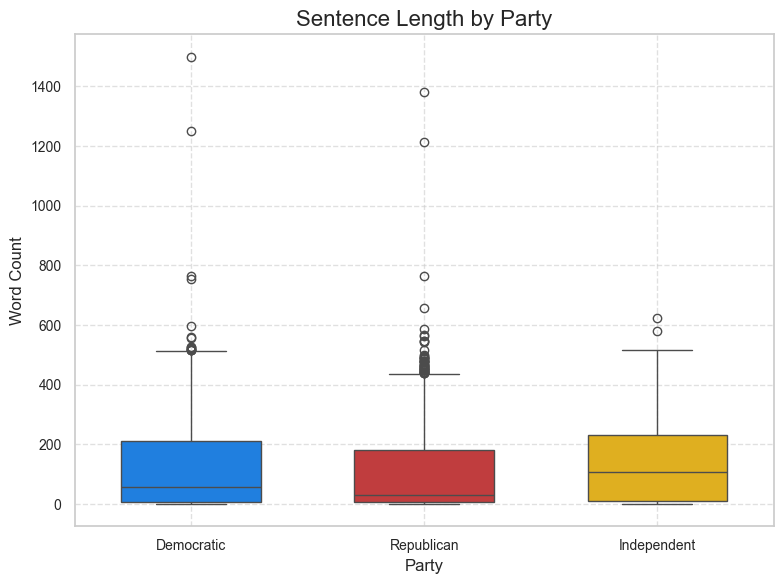

In [101]:
# Filter candidates only
df_candidates = df_debate[df_debate['is_candidate'] == True].copy()
df_candidates['word_count'] = df_candidates['dialogue'].apply(lambda x: len(str(x).split()))
#df_candidates = df_candidates[df_candidates['word_count'] <= 600] 

# Custom party color palette 
party_palette = {
    'Democratic': '#007FFF',   
    'Republican': '#d62728',    
    'Independent': '#FFBF00'   
}

plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_candidates,
    x='party',
    y='word_count',
    palette=party_palette,
    showfliers=True,
    width=0.6
)

plt.title('Sentence Length by Party', fontsize=16)
plt.xlabel('Party', fontsize=12)
plt.ylabel('Word Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
